<a href="https://colab.research.google.com/github/caltunay/dd_competition_eq_damage_prediction/blob/master/Competition_EQ_Take_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
path_train_labels = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Earthquake Damage Prediction/train_labels.csv'
path_train_values = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Earthquake Damage Prediction/train_values.csv' 
path_test_values = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Earthquake Damage Prediction/test_values.csv'

train_labels = pd.read_csv(path_train_labels)
train_values = pd.read_csv(path_train_values)
test_values = pd.read_csv(path_test_values)

In [0]:
temp_df = pd.DataFrame(columns=['column', 'dtype'])

for col in train_values.columns.values.tolist():

    temp_dict = {'column':col,
                 'dtype':train_values[col].dtype}

    temp_df = temp_df.append(temp_dict, ignore_index = True)

temp_df.set_index('column', inplace = True)




In [0]:
drop = ['geo_level_2_id', 'geo_level_3_id']

train_values.drop(labels = drop, axis = 1, inplace = True)

In [0]:
type_list = []

for col in train_values.columns.values.tolist():

    if train_values[col].dtype == 'object':
        type_list.append(col)# type_list + col
    else:
        pass


In [0]:
type_list

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [0]:
train_values = pd.get_dummies(data = train_values, prefix_sep = '|',   columns = type_list, drop_first = True)


In [0]:
all = pd.merge(left = train_values, right = train_labels, on = 'building_id', how = 'inner')

In [0]:
series, bins = pd.qcut(x = all['geo_level_1_id'], q = 6, retbins = True, labels = ['freq1', 'freq2', 'freq3', 'freq4', 'freq5','freq6'])
series.rename('geo_level_freq', inplace = True)

# all = pd.concat([all, series], axis = 1)
# all = pd.get_dummies(data = all, prefix_sep = '|', columns = ['geo_level_1_id'], drop_first = True)

In [0]:
all = pd.concat([all, series], axis = 1)
# all.drop(labels = 'geo_level_1_id', inplace = True)

In [0]:
all.drop(labels = 'geo_level_1_id', inplace = True, axis = 1)

In [0]:
all.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,roof_type|x,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|s,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,damage_grade,geo_level_freq
0,802906,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,3,freq1
1,28830,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,2,freq2
2,94947,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,3,freq5
3,590882,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,2,freq5
4,201944,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,freq3


In [0]:
all = pd.get_dummies(data = all, columns = ['geo_level_freq'], drop_first = True, prefix_sep = '|')

In [0]:
all.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,roof_type|x,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|s,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,damage_grade,geo_level_freq|freq2,geo_level_freq|freq3,geo_level_freq|freq4,geo_level_freq|freq5,geo_level_freq|freq6
0,802906,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0
1,28830,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0
2,94947,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,3,0,0,0,1,0
3,590882,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0
4,201944,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,0,1,0,0,0


In [0]:
# all = pd.merge(left = train_values, right = train_labels, on = 'building_id', how = 'inner')

In [0]:
# all.drop(labels = 'geo_level_1_id', axis = 1, inplace = True)

In [0]:
# x = all.drop(labels = ['building_id', 'damage_grade'], axis = 1).values
# y = all['damage_grade'].values

In [0]:
# all.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,roof_type|x,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|s,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,damage_grade
0,802906,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,3
1,28830,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,2
2,94947,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,3
3,590882,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,2
4,201944,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3


In [0]:
all['damage_grade'].value_counts(normalize = True)

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

In [0]:
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
x = all.drop(labels = ['building_id', 'damage_grade'], axis = 1).values
y = all['damage_grade'].values

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
ssx = StandardScaler()
scaled_x = ssx.fit_transform(x)

In [0]:
class2, class3, class1 = all['damage_grade'].value_counts()

In [0]:
df_class1 = all[all['damage_grade'] == 1]
df_class2 = all[all['damage_grade'] == 2]
df_class3 = all[all['damage_grade'] == 3]

In [0]:
df_class2_undersampled = df_class2.sample(n = class1)
df_class3_undersampled = df_class3.sample(n = class1)

In [0]:
undersampled_df = pd.concat([df_class1, df_class2_undersampled, df_class3_undersampled], axis = 0)
undersampled_df.reset_index(drop = True, inplace = True)
undersampled_df.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,roof_type|x,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|s,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,damage_grade,geo_level_freq|freq2,geo_level_freq|freq3,geo_level_freq|freq4,geo_level_freq|freq5,geo_level_freq|freq6
0,475515,2,0,8,6,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1,989500,1,0,13,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,864809,2,0,9,8,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,440102,1,5,11,3,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
4,402996,1,0,15,3,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [0]:
undersampled_df['damage_grade'].value_counts()

3    25124
2    25124
1    25124
Name: damage_grade, dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
for_cols = undersampled_df.drop(labels = ['building_id', 'damage_grade'], axis = 1).columns.values.tolist()

In [0]:
for col in for_cols:
    
    print(col)

    temp_skew = undersampled_df[col].skew()
    print('skew : ', temp_skew)

    temp_kurt = undersampled_df[col].kurt()
    print('kurtosis : ',temp_kurt)
    print('\n')

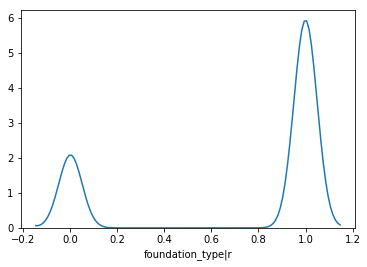

In [0]:
sns.distplot(undersampled_df['foundation_type|r'], hist = False)

In [0]:
undersampled_df['foundation_type|r'].skew()

-1.0956424392015407

In [0]:
to_scale = undersampled_df.nunique().sort_values(ascending = False)[1:6].index.values.tolist()

In [0]:
binary_df = undersampled_df.nunique().sort_values(ascending = False)[7:].index.values.tolist()

In [0]:
undersampled_df['damage_grade']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
75342    3
75343    3
75344    3
75345    3
75346    3
75347    3
75348    3
75349    3
75350    3
75351    3
75352    3
75353    3
75354    3
75355    3
75356    3
75357    3
75358    3
75359    3
75360    3
75361    3
75362    3
75363    3
75364    3
75365    3
75366    3
75367    3
75368    3
75369    3
75370    3
75371    3
Name: damage_grade, Length: 75372, dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler

ssx = StandardScaler()
scaled_x = ssx.fit_transform(undersampled_df[to_scale])

In [0]:
scaled_x_df = pd.DataFrame(scaled_x, columns = to_scale)

In [0]:
binary_df = undersampled_df[binary_df]

In [0]:
train_df = pd.concat([scaled_x_df, binary_df], axis = 1).head()

In [0]:
train_df['damage_grade']

KeyError: ignored

In [0]:
rus = RandomUnderSampler(random_state = 42)

rus.fit_sample()    #fit_sample(x_train, y_train)

In [0]:
class2, class3, class1 = all['damage_grade'].value_counts()

25124

In [0]:
transposed = train_values.head().transpose()

pd.concat([transposed, temp_df], axis = 1)

,0,1,2,3,4,dtype
column,,,,,,
building_id,802906,28830,94947,590882,201944,int64
geo_level_1_id,6,8,21,22,11,int64
geo_level_2_id,487,900,363,418,131,int64
geo_level_3_id,12198,2812,8973,10694,1488,int64
count_floors_pre_eq,2,2,2,2,3,int64
age,30,10,10,10,30,int64
area_percentage,6,8,5,6,8,int64
height_percentage,5,7,5,5,9,int64
land_surface_condition,t,o,t,t,t,object


Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [0]:
temp_df.head()

,column,dtype
0,building_id,int64
1,geo_level_1_id,int64
2,geo_level_2_id,int64
3,geo_level_3_id,int64
4,count_floors_pre_eq,int64


In [0]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [0]:
has_list = []
for col in train_values.columns.values.tolist():

    if 'has' in col:
        has_list.append(col)
    else:
        pass



In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
n = 1
plt.figure(figsize = (20,30))

for col in has_list:



    plt.subplot(11,2,n)
    sns.distplot(train_values[col],hist = False)
    # plt.title(train_values[col].value_counts())

    n += 1

plt.tight_layout()
plt.show()

In [0]:
for col in has_list:

    v = train_values[col].value_counts(normalize = True)
    print(v)

0    0.911355
1    0.088645
Name: has_superstructure_adobe_mud, dtype: float64
1    0.761935
0    0.238065
Name: has_superstructure_mud_mortar_stone, dtype: float64
0    0.965668
1    0.034332
Name: has_superstructure_stone_flag, dtype: float64
0    0.981765
1    0.018235
Name: has_superstructure_cement_mortar_stone, dtype: float64
0    0.931846
1    0.068154
Name: has_superstructure_mud_mortar_brick, dtype: float64
0    0.924732
1    0.075268
Name: has_superstructure_cement_mortar_brick, dtype: float64
0    0.745012
1    0.254988
Name: has_superstructure_timber, dtype: float64
0    0.914989
1    0.085011
Name: has_superstructure_bamboo, dtype: float64
0    0.95741
1    0.04259
Name: has_superstructure_rc_non_engineered, dtype: float64
0    0.984141
1    0.015859
Name: has_superstructure_rc_engineered, dtype: float64
0    0.985015
1    0.014985
Name: has_superstructure_other, dtype: float64
0    0.88812
1    0.11188
Name: has_secondary_use, dtype: float64
0    0.935622
1    0.064378
Na

In [0]:
for col in has_list:

    s = train_values[col].skew()
    k = train_values[col].kurt()
    print(col)
    print(s)
    print(k)

has_superstructure_adobe_mud
2.894530020077062
6.378352988169813
has_superstructure_mud_mortar_stone
-1.2300395912700481
-0.4870063415302188
has_superstructure_stone_flag
5.1149826431955665
24.163232882498
has_superstructure_cement_mortar_stone
7.201350444931503
49.85983088330059
has_superstructure_mud_mortar_brick
3.427233210061134
9.746002272440656
has_superstructure_cement_mortar_brick
3.2198316414144004
8.367380015018295
has_superstructure_timber
1.1242929552135028
-0.7359709991753975
has_superstructure_bamboo
2.9759316828457427
6.856221999445649
has_superstructure_rc_non_engineered
4.530386709900795
18.52454590906734
has_superstructure_rc_engineered
7.75051744092648
58.07096627160488
has_superstructure_other
7.9844322094724935
61.75163162467633
has_secondary_use
2.4625604205888525
4.064235016238359
has_secondary_use_agriculture
3.549955340586051
10.602264287890879
has_secondary_use_hotel
5.174349474228261
24.77408261175995
has_secondary_use_rental
10.975364669452556
118.4595387531